Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
#!pip install -q kaggle

In [3]:
# Download latest version
path = kagglehub.dataset_download("stealthtechnologies/employee-attrition-dataset")

print("Path to dataset files:", path)
print(os.listdir(path))
attrition_df = pd.read_csv(os.path.join(path, 'test.csv'))
attrition_df.head()

100%|██████████| 1.72M/1.72M [00:00<00:00, 95.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/stealthtechnologies/employee-attrition-dataset/versions/2
['test.csv', 'train.csv']


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed


In [4]:
train_df = pd.read_csv(os.path.join(path, 'train.csv'))
train_df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [5]:
df = pd.concat([train_df, attrition_df])
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [6]:
if 'Employee ID' in attrition_df.columns:
    attrition_df = attrition_df.drop('Employee ID', axis=1)

if 'Company Tenure' in attrition_df.columns:
    attrition_df = attrition_df.drop('Company Tenure', axis=1)

In [7]:
print(attrition_df.shape)
print(attrition_df.columns)
print(attrition_df.dtypes)

(14900, 22)
Index(['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')
Age                          int64
Gender                      object
Years at Company             int64
Job Role                    object
Monthly Income               int64
Work-Life Balance           object
Job Satisfaction            object
Performance Rating          object
Number of Promotions         int64
Overtime                    object
Distance from Home           int64
Education Level             object
Marital Status              object
Number of Dependents         int64
Job Level         

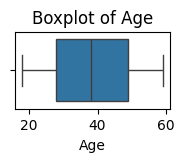

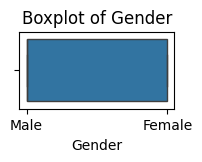

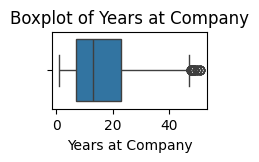

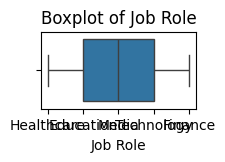

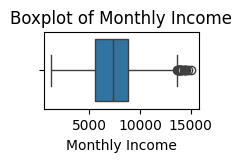

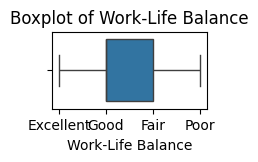

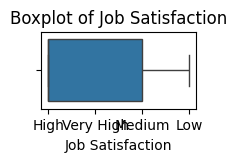

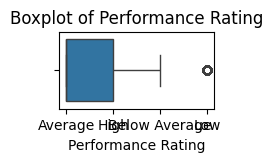

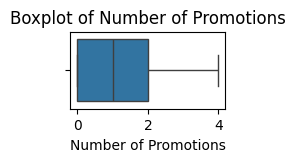

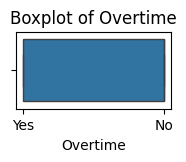

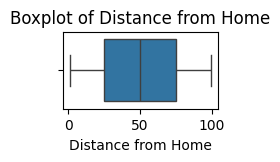

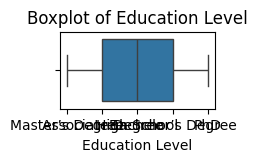

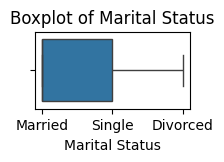

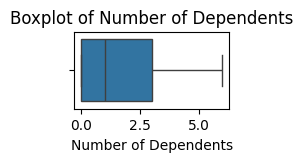

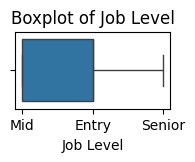

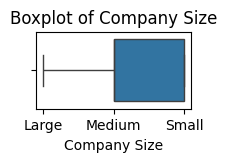

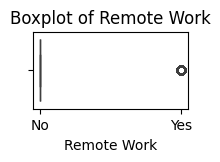

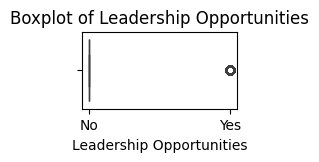

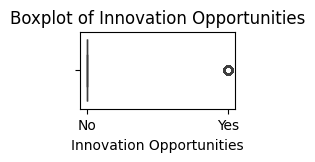

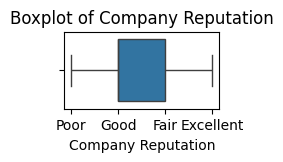

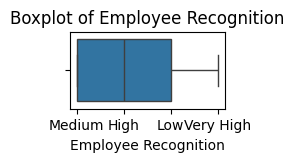

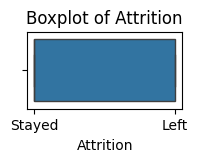

In [8]:
def plot_boxplot(df, column):
  plt.figure(figsize=(2, 1))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

for col in attrition_df.columns:
  plot_boxplot(attrition_df, col)

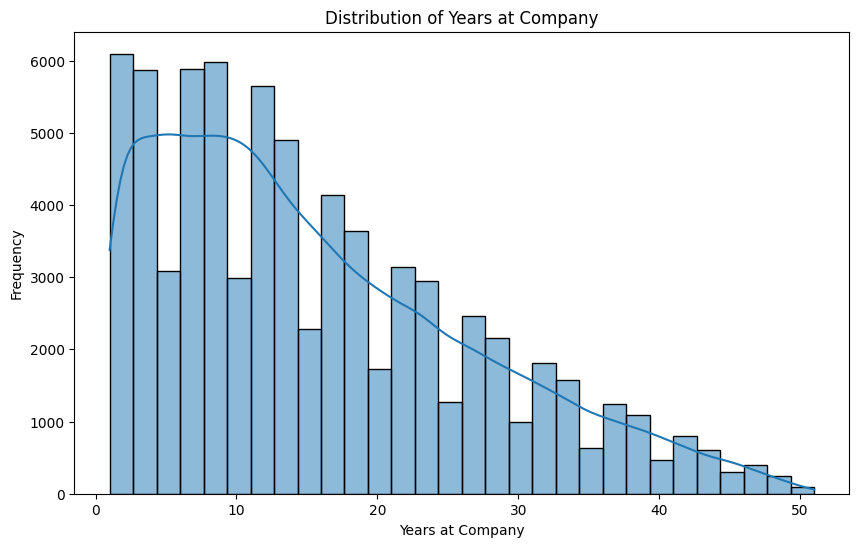

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Years at Company'], bins=30, kde=True)
plt.title('Distribution of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()


In [10]:
attrition_df.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329
std,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000
25%,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000
50%,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000
75%,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000
max,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000


51 years as the max Years at Company seems infeasible. The max Age is 59 and the max years at Company is 51. Say someone started working at one company at 16 years old and stayed there until retirement, that is 59 - 16 = 43 years at the company.

In [11]:
# Remove outliers from Years at Company anything greater than 40
attrition_df = attrition_df[attrition_df['Years at Company'] <= 40]


In [12]:
print("Clean data shape:", attrition_df.shape)
display(attrition_df.head())

Clean data shape: (14415, 22)


,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,36,Male,13,Healthcare,8029,Excellent,High,Average,1,Yes,...,Married,1,Mid,Large,No,No,No,Poor,Medium,Stayed
1,35,Male,7,Education,4563,Good,High,Average,1,Yes,...,Single,4,Entry,Medium,No,No,No,Good,High,Left
2,50,Male,7,Education,5583,Fair,High,Average,3,Yes,...,Divorced,2,Senior,Medium,No,No,Yes,Good,Low,Stayed
4,39,Male,24,Education,4604,Good,High,Average,0,Yes,...,Married,6,Mid,Large,Yes,No,No,Good,High,Stayed
5,45,Female,30,Healthcare,8104,Fair,High,Average,0,No,...,Divorced,0,Senior,Large,No,No,No,Good,Low,Stayed


In [13]:
ordinal_var = ['Job Satisfaction', 'Performance Rating', 'Work-Life Balance', 'Education Level', 'Job Level', 'Company Size', 'Company Reputation', 'Employee Recognition']

In [14]:
# ordinal features and their respectiv
ordinal_features = [
    'Job Satisfaction',
    'Performance Rating',
    'Work-Life Balance',
    'Education Level',
    'Job Level',
    'Company Size',
    'Company Reputation',
    'Employee Recognition'
]

categories = [
    ['Low','Medium','High','Very High'], # Job Satisfaction
    ['Low','Below Average','Average','High'], # performance rating
    ['Poor','Fair','Good','Excellent'], #work-life balance
    ['High School','Associate Degree',"Bachelor’s Degree","Master’s Degree",'PhD'], # education level
    ['Entry','Mid','Senior'], # Job level
    ['Small','Medium','Large'], # company size
    ['Poor','Fair','Good','Excellent'], # company reputation
    ['Low','Medium','High','Very High'], # employee recognition
]

encoder = OrdinalEncoder(categories=categories, dtype=int)


encoded = encoder.fit_transform(attrition_df[ordinal_features])

encoded_df = pd.DataFrame(
    encoded,
    columns=[f"{c}_ord" for c in ordinal_features],
    index=attrition_df.index
)


attrition_df = pd.concat([attrition_df, encoded_df], axis=1)
attrition_df.drop(columns=ordinal_features, inplace=True)




In [15]:
#label encoder for attriton column
le = LabelEncoder()
attrition_df['Attrition'] = le.fit_transform(attrition_df['Attrition'])
attrition_df.head()
#stayed is 1 left is 0

,Age,Gender,Years at Company,Job Role,Monthly Income,Number of Promotions,Overtime,Distance from Home,Marital Status,Number of Dependents,...,Innovation Opportunities,Attrition,Job Satisfaction_ord,Performance Rating_ord,Work-Life Balance_ord,Education Level_ord,Job Level_ord,Company Size_ord,Company Reputation_ord,Employee Recognition_ord
0,36,Male,13,Healthcare,8029,1,Yes,83,Married,1,...,No,1,2,2,3,3,1,2,0,1
1,35,Male,7,Education,4563,1,Yes,55,Single,4,...,No,0,2,2,2,1,0,1,2,2
2,50,Male,7,Education,5583,3,Yes,14,Divorced,2,...,Yes,1,2,2,1,1,2,1,2,0
4,39,Male,24,Education,4604,0,Yes,47,Married,6,...,No,1,2,2,2,3,1,2,2,2
5,45,Female,30,Healthcare,8104,0,No,38,Divorced,0,...,No,1,2,2,1,1,2,2,2,0


In [16]:
# Map Yes to 1 and No to 0
yesno_var = ['Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']
def convert_yes_no(df, column_name):
    df[column_name] = df[column_name].astype(str).map({'Yes': 1, 'No': 0})
    return df

for col in yesno_var:
    yesno_df = convert_yes_no(attrition_df, col)
yesno_df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Number of Promotions,Overtime,Distance from Home,Marital Status,Number of Dependents,...,Innovation Opportunities,Attrition,Job Satisfaction_ord,Performance Rating_ord,Work-Life Balance_ord,Education Level_ord,Job Level_ord,Company Size_ord,Company Reputation_ord,Employee Recognition_ord
0,36,Male,13,Healthcare,8029,1,1,83,Married,1,...,0,1,2,2,3,3,1,2,0,1
1,35,Male,7,Education,4563,1,1,55,Single,4,...,0,0,2,2,2,1,0,1,2,2
2,50,Male,7,Education,5583,3,1,14,Divorced,2,...,1,1,2,2,1,1,2,1,2,0
4,39,Male,24,Education,4604,0,1,47,Married,6,...,0,1,2,2,2,3,1,2,2,2
5,45,Female,30,Healthcare,8104,0,0,38,Divorced,0,...,0,1,2,2,1,1,2,2,2,0


In [17]:
ohe_var = ['Gender', 'Job Role', 'Marital Status']

# Instantiate OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# fit and transforn
# create a temporary array
temp = enc.fit_transform(attrition_df[ohe_var]).toarray()

# create temp_df with encoded data
temp = pd.DataFrame(temp, columns=enc.get_feature_names_out())

# merge the two dataframes
attrition_df = attrition_df.merge(temp, left_index=True, right_index=True)

# drop original columns
attrition_df.drop(columns=ohe_var, inplace=True)
attrition_df.head()
# change gender columns to type int
#attrition_df = df.astype({'Gender_Female': 'int', 'Gender_Male': 'int'})

,Age,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Remote Work,Leadership Opportunities,Innovation Opportunities,...,Gender_Female,Gender_Male,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,36,13,8029,1,1,83,1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,35,7,4563,1,1,55,4,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,50,7,5583,3,1,14,2,0,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,39,24,4604,0,1,47,6,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,45,30,8104,0,0,38,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
continuous_var = ['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents']

In [19]:
# Scale Continuous Variables
scaler = MinMaxScaler()
attrition_df[continuous_var] = scaler.fit_transform(attrition_df[continuous_var])
attrition_df.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Remote Work,Leadership Opportunities,Innovation Opportunities,...,Gender_Female,Gender_Male,Job Role_Education,Job Role_Finance,Job Role_Healthcare,Job Role_Media,Job Role_Technology,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0.439024,0.307692,0.504636,0.25,1,0.836735,0.166667,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.414634,0.153846,0.247534,0.25,1,0.551020,0.666667,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.780488,0.153846,0.323196,0.75,1,0.132653,0.333333,0,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.512195,0.589744,0.250575,0.00,1,0.469388,1.000000,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.658537,0.743590,0.510200,0.00,0,0.377551,0.000000,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Summary Statistics


---
### Logistic Regression

In [20]:
# This will be used for the remainder of the notebook
X = attrition_df.drop('Attrition', axis=1)
y = attrition_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")
# wasnt the model accuracy at 73%?
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 71.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70      1285
           1       0.75      0.72      0.73      1504

    accuracy                           0.72      2789
   macro avg       0.72      0.72      0.72      2789
weighted avg       0.72      0.72      0.72      2789



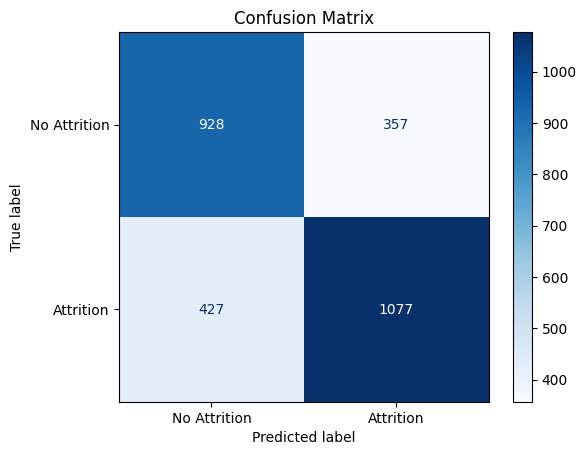

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Attrition', 'Attrition'])
display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

---
### Decision Tree

In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
# Fit a DecisionTreeClassifier model
tree = DecisionTreeClassifier(random_state=42)

# print default parameters
print("Default parameters:\n")
pprint(tree.get_params())
print()

# fit the model
tree.fit(X_train, y_train)
tree.get_depth()

y_pred = tree.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%\n')
tree_classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", tree_classification_report)
print(f'Tree Depth: {tree.get_depth()}')

Default parameters:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

Accuracy: 61.85%

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61      1285
           1       0.66      0.60      0.63      1504

    accuracy                           0.62      2789
   macro avg       0.62      0.62      0.62      2789
weighted avg       0.62      0.62      0.62      2789

Tree Depth: 30


In [23]:
# capture cm to compare later
cm_before_tuning = confusion_matrix(y_test, y_pred)

##### Tuning hyperparmaters with GridSearchCV

In [24]:
# Prepare the hyperparameters values to search
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
min_samples_leaf = np.arange(2, 15, 2)
min_samples_split = [2, 3, 5, 7, 10]

combinations = len(max_depth) * len(min_samples_leaf) * len(min_samples_split)
print(f"Grid Search will try {combinations} hyperparameter combinations")

# Create the hyperparameter grid
# Grid set up will used with multiple models below
grid = {'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'class_weight': ['balanced']
       }

# Instantiate the grid search model
#  Note: cv=5 for faster computation
gs = GridSearchCV(tree, param_grid=grid,
                  scoring="accuracy", verbose=1,
                  n_jobs=-1, cv=5, return_train_score=True)

Grid Search will try 350 hyperparameter combinations


In [25]:
%%time
# Fit gridsearch
gs.fit(X_train, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits
CPU times: user 5.21 s, sys: 1.09 s, total: 6.3 s
Wall time: 2min


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'min_samples_split': [2, 3, 5, 7, 10]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [26]:
# Review best parameters and accuracy score from grid search
print("Optimal hyperparameter combination:", gs.best_params_)
print("\nMean cross-validated training accuracy score:", np.round(gs.best_score_,4))

Optimal hyperparameter combination: {'class_weight': 'balanced', 'max_depth': 6, 'min_samples_leaf': np.int64(4), 'min_samples_split': 2}

Mean cross-validated training accuracy score: 0.6933


In [27]:
# Train with gs.best_params_ from cell above
gs.best_estimator_.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=np.int64(4), random_state=42)

In [28]:
# Review best grid search estimator's predictions on the test data
y_pred = gs.best_estimator_.predict(X_test)
grid_search_test_accuracy = np.round(accuracy_score(y_test, y_pred), 4)
print("Test accuracy:", np.round(accuracy_score(y_test, y_pred), 3) *100,'%')

Test accuracy: 70.6 %


In [29]:
# New confusion matrix
cm_after_tuning_tree = confusion_matrix(y_test, y_pred)

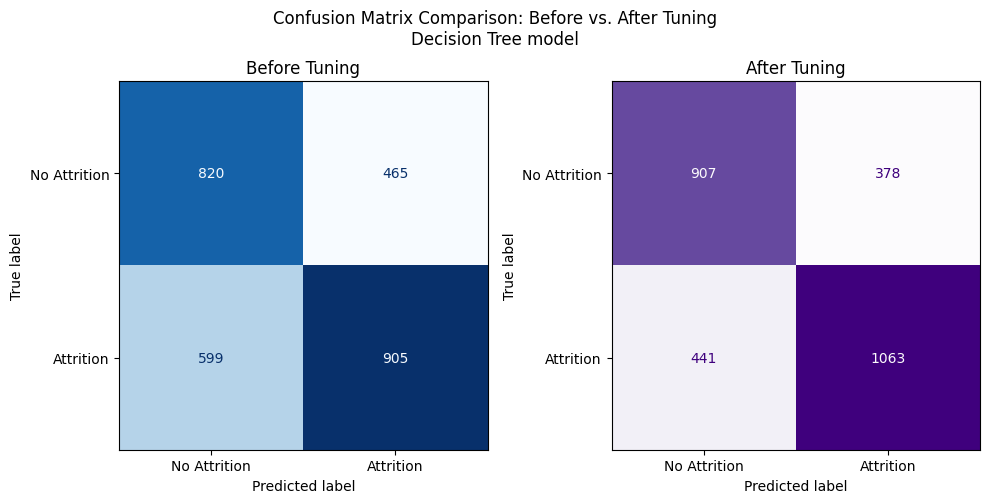

In [30]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Create two subplots side by side and unpack the output
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix for the original model (before tuning)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before_tuning, display_labels=['No Attrition', 'Attrition'])
disp_before.plot(ax=ax1, cmap='Blues', colorbar=False)  # Plot on the first subplot

# Plot the confusion matrix for the new model (after tuning)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after_tuning_tree, display_labels=['No Attrition', 'Attrition'])
disp_after.plot(ax=ax2,cmap='Purples', colorbar=False)  # Plot on the second subplot

# Add titles to the subplots
ax1.set_title('Before Tuning')
ax2.set_title('After Tuning')

# Add a title for the entire figure
f.suptitle('Confusion Matrix Comparison: Before vs. After Tuning\nDecision Tree model', fontsize=12)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


---
### Random Forest

In [31]:
# Instantiate the Random Forest model with a fixed random state for reproducy
forest = RandomForestClassifier(random_state=42)

# Fit the model on the training data
forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = forest.predict(X_test)

# capture confusion natrix
cm_before_tuning_forest = confusion_matrix(y_test, y_pred)

# Print the accuracy score (percentage of correct predictions)
print('Random Forest Metrics Before Tuning\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n')

# Generate a detailed classification report
forest_classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", forest_classification_report)


Random Forest Metrics Before Tuning

Accuracy: 70.78%

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.72      0.69      1285
           1       0.75      0.70      0.72      1504

    accuracy                           0.71      2789
   macro avg       0.71      0.71      0.71      2789
weighted avg       0.71      0.71      0.71      2789



In [32]:
# Instantiate the grid search model
#  Note: cv=7 for faster computation lower it
gs = GridSearchCV(forest, param_grid=grid,
                  scoring="accuracy", verbose=1,
                  n_jobs=-1, cv=5, return_train_score=True)

In [33]:
%%time
# Fit gridsearch
gs.fit(X_train, y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits
CPU times: user 18.7 s, sys: 4.13 s, total: 22.8 s
Wall time: 24min 27s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'min_samples_split': [2, 3, 5, 7, 10]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [34]:
# Review best parameters and accuracy score from grid search
print("Optimal hyperparameter combination:", gs.best_params_)
print("\nMean cross-validated training accuracy score:", np.round(gs.best_score_,4))

Optimal hyperparameter combination: {'class_weight': 'balanced', 'max_depth': 14, 'min_samples_leaf': np.int64(10), 'min_samples_split': 2}

Mean cross-validated training accuracy score: 0.7134


In [35]:
# Train with gs.best_params_ from cell above
gs.best_estimator_.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=14,
                       min_samples_leaf=np.int64(10), random_state=42)

In [36]:
# make prediction using optimized model
y_pred = gs.best_estimator_.predict(X_test)

In [37]:
# New confusion matrix
cm_after_tuning_forest = confusion_matrix(y_test, y_pred)

In [38]:
# Print the accuracy score (percentage of correct predictions)
print('Random Forest Metrics After Tuning\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n')

Random Forest Metrics After Tuning

Accuracy: 71.24%



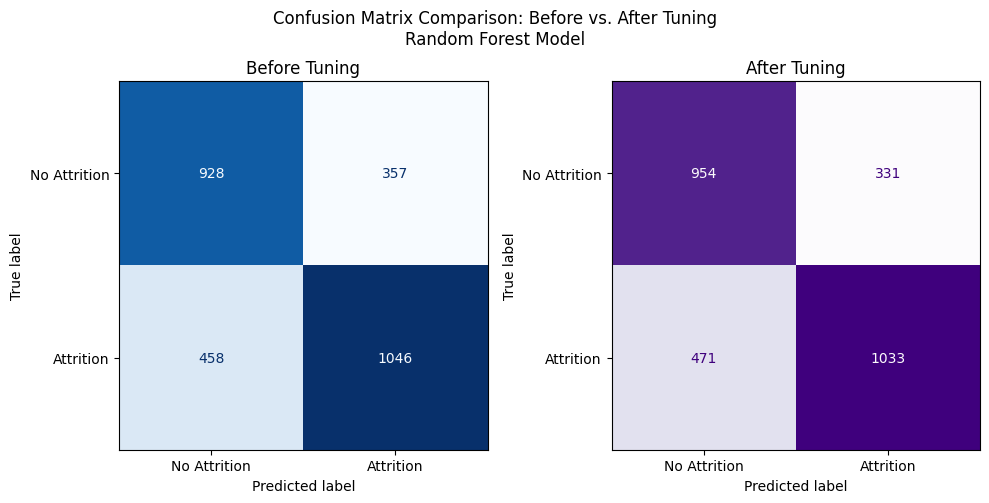

In [39]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Create two subplots side by side and unpack the output
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix for the original model (before tuning)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before_tuning_forest, display_labels=['No Attrition', 'Attrition'])
disp_before.plot(ax=ax1, cmap='Blues', colorbar=False)  # Plot on the first subplot

# Plot the confusion matrix for the new model (after tuning)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after_tuning_forest, display_labels=['No Attrition', 'Attrition'])
disp_after.plot(ax=ax2,cmap='Purples', colorbar=False)  # Plot on the second subplot

# Add titles to the subplots
ax1.set_title('Before Tuning')
ax2.set_title('After Tuning')

# Add a title for the entire figure
f.suptitle('Confusion Matrix Comparison: Before vs. After Tuning\nRandom Forest Model', fontsize=12)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


*Support* Vector Machine

In [40]:
# Instantiate the SVC model
SVC= SVC()

# Print Default parameters
print("Default parameters for SVC:\n")
pprint(SVC.get_params())
print()

# Fit training data to model
SVC.fit(X_train, y_train)

# Make predictions
y_pred = SVC.predict(X_test)

# Capture confusion matrix
cm_before_tuning_SVC = confusion_matrix(y_test, y_pred)

# Print the accuracy score (percentage of correct predictions)
print('SVC Metrics Before Tuning\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

# Print detailed classification report
SVC_classification_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", SVC_classification_report)


Default parameters for SVC:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

SVC Metrics Before Tuning

Accuracy: 71.82%

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70      1285
           1       0.75      0.71      0.73      1504

    accuracy                           0.72      2789
   macro avg       0.72      0.72      0.72      2789
weighted avg       0.72      0.72      0.72      2789



In [41]:
# Create Grid Search for SVC
grid = {'C': [0.1, 1],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced']
       }

# Instantiate the grid
# CV = 5 reduce computation time
gs = GridSearchCV(SVC, param_grid=grid,
                  scoring="accuracy", verbose=1,
                  n_jobs=-1, cv=5, return_train_score=True)

In [ ]:
%%time
# Fit gridsearch
gs.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
# Review best parameters and accuracy score from grid search
print("Optimal hyperparameter combination:", gs.best_params_)
print("\nMean cross-validated training accuracy score:", np.round(gs.best_score_,4))

In [ ]:
# Train with gs.best_params_ from cell above
gs.best_estimator_.fit(X_train, y_train)

In [ ]:
# make prediction using optimized model
y_pred = gs.best_estimator_.predict(X_test)

In [ ]:
# New confusion matrix
cm_after_tuning_SVC = confusion_matrix(y_test, y_pred)

In [ ]:
# Print the accuracy score (percentage of correct predictions)
print('SVC Metrics After Tuning\n')
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%\n')

In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# Create two subplots side by side and unpack the output
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the confusion matrix for the original model (before tuning)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before_tuning_SVC, display_labels=['No Attrition', 'Attrition'])
disp_before.plot(ax=ax1, cmap='Blues', colorbar=False)  # Plot on the first subplot

# Plot the confusion matrix for the new model (after tuning)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after_tuning_SVC, display_labels=['No Attrition', 'Attrition'])
disp_after.plot(ax=ax2,cmap='Purples', colorbar=False)  # Plot on the second subplot

# Add titles to the subplots
ax1.set_title('Before Tuning')
ax2.set_title('After Tuning')

# Add a title for the entire figure
f.suptitle('Confusion Matrix Comparison: Before vs. After Tuning\nSVC Model', fontsize=12)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()


### Display all confusion matrix

In [ ]:
# List of confusion matrices to be plotted
all_cm = [cm, cm_after_tuning_tree, cm_after_tuning_forest, cm_after_tuning_SVC]

# Create a 2x2 grid of subplots
f, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot each confusion matrix on its respective subplot
axs[0, 0].set_title('Logistic Model')
ConfusionMatrixDisplay(confusion_matrix=all_cm[0], display_labels=['No Attrition', 'Attrition']).plot(ax=axs[0, 0], cmap='Blues', colorbar=False)

axs[0, 1].set_title('After Tuning Decicion Tree')
ConfusionMatrixDisplay(confusion_matrix=all_cm[1], display_labels=['No Attrition', 'Attrition']).plot(ax=axs[0, 1], cmap='Purples', colorbar=False)

axs[1, 0].set_title('After Tuning Forest')
ConfusionMatrixDisplay(confusion_matrix=all_cm[2], display_labels=['No Attrition', 'Attrition']).plot(ax=axs[1, 0], cmap='Greens', colorbar=False)

axs[1, 1].set_title('After Tuning SVC')
ConfusionMatrixDisplay(confusion_matrix=all_cm[3], display_labels=['No Attrition', 'Attrition']).plot(ax=axs[1, 1], cmap='Oranges', colorbar=False)

# Add a title for the entire figure
f.suptitle('Confusion Matrix Comparison', fontsize=14)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("confusion_matrices_comparison.png")

plt.show()


In [ ]:
# Set style
sns.set(style="whitegrid")

# Attrition count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.show()

In [ ]:
# Monthly Income by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Attrition', y='Monthly Income', palette='coolwarm')
plt.title('Monthly Income vs Attrition')
plt.ylabel('Monthly Income')
plt.xlabel('Attrition')
plt.show()

In [ ]:
# Work-Life Balance vs Attrition
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Work-Life Balance', hue='Attrition', palette='Set3')
plt.title('Work-Life Balance and Attrition')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Attrition by Job Role
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Job Role', hue='Attrition', palette='Set1', order=df['Job Role'].value_counts().index)
plt.title('Attrition by Job Role')
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')
plt.show()

In [ ]:
# Age distribution by Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, multiple='stack', palette='Set2')
plt.title('Age Distribution by Attrition')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()